# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load a dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/feature engineering /data.csv')
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/feature engineering /data.csv')


In [5]:
# Check data
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [6]:
data.shape


(11914, 16)

this is the shape of the dataset

In [7]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

here is a list of all the diffrent pieces of data and there names

In [8]:
data.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


above is the types of each column

### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [9]:
data.isnull().sum()
#data.dropna(inplace=True)


,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


marktet category , engine cylinders ,engine hp , and engine fuel type all have missing data shown above  

### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [10]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [16]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

above we see the mean median min max standard dev of all the numberical columns and also a summary of the dataset

### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

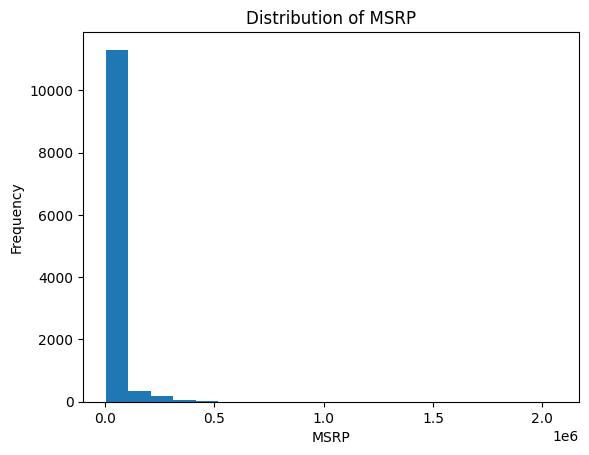

In [13]:
plt.hist(data['MSRP'], bins=20)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Distribution of MSRP')
plt.show()

its mainlly distributed to the lefthand side all of it falling between the 0 and a little over .5 range with few outlyers landing all the way up past 2.0 but most in the 0-0.5 range


### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

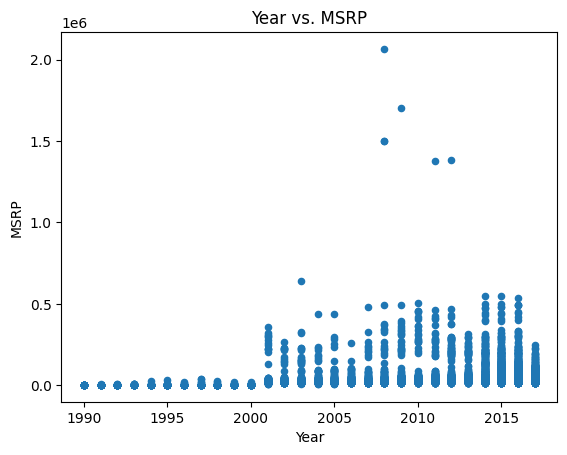

In [17]:
scatterplot = data.plot(kind='scatter', x='Year', y='MSRP', title='Year vs. MSRP')

the year vs msrp shows that over the years the msrp has increased seeing a upwords growth

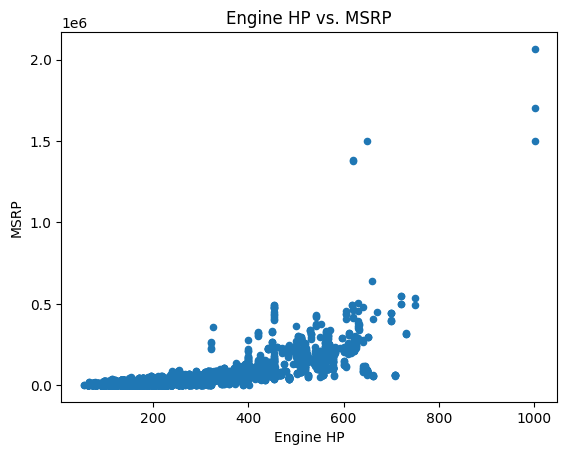

In [18]:
scatterplot = data.plot(kind='scatter', x='Engine HP', y='MSRP', title='Engine HP vs. MSRP')

again like the last splot as the msrp goes up the HP of the engine also rises for the most part correlating a higher msrp = higher quality cars

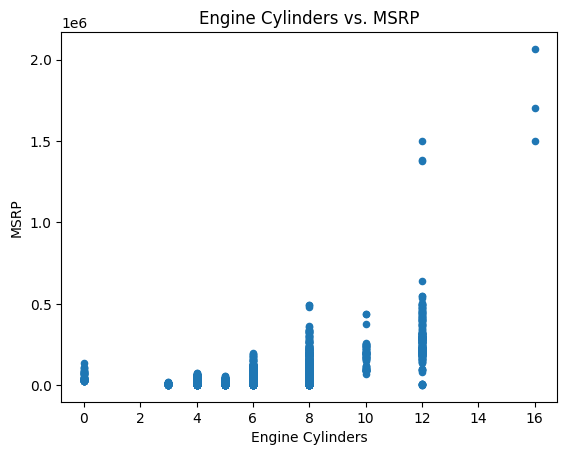

In [19]:
scatterplot = data.plot(kind='scatter', x='Engine Cylinders', y='MSRP', title='Engine Cylinders vs. MSRP')

again like with the last one the cylinders has a correlation to msrp more msrp = more engine cylinders

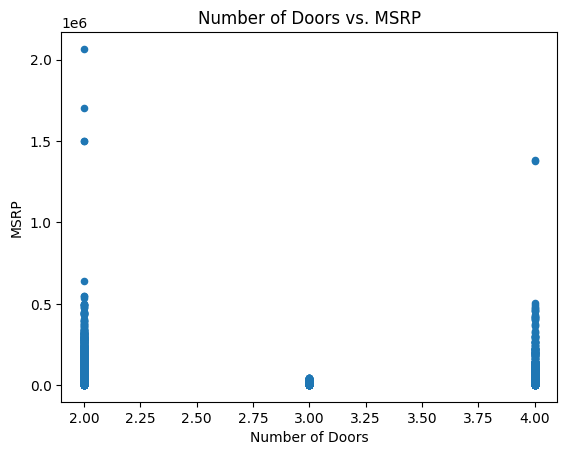

In [20]:
scatterplot = data.plot(kind='scatter', x='Number of Doors', y='MSRP', title='Number of Doors vs. MSRP')

this one has no real correlation doors doesnt seem to matter to msrp

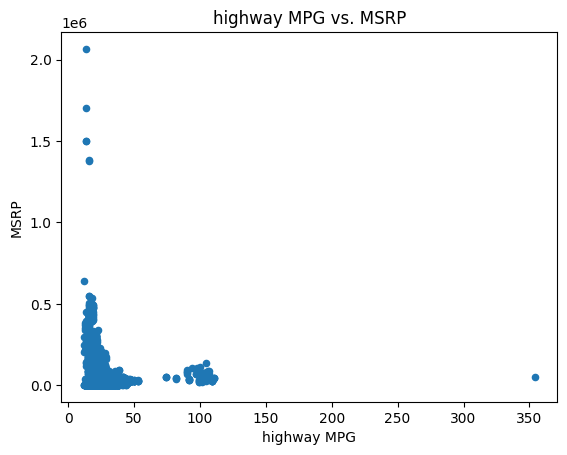

In [21]:
scatterplot = data.plot(kind='scatter', x='highway MPG', y='MSRP', title='highway MPG vs. MSRP')

this one is the opposite from before being more so left leaning where more msrp doesnt mean more highway mpg the argument from this data would say less msrp can be linked to more highway mpg


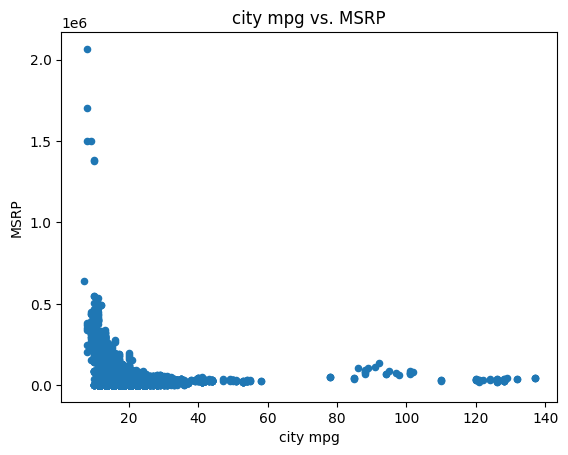

In [22]:
scatterplot = data.plot(kind='scatter', x='city mpg', y='MSRP', title='city mpg vs. MSRP')

again this shows the same story as the other plot where msrp being lower typically means a higher mpg but still alot of data to the left

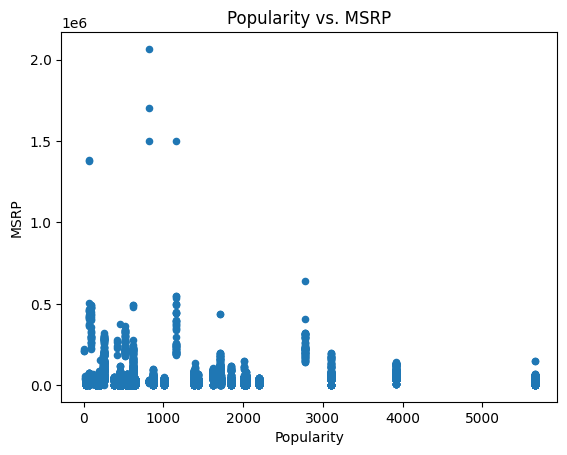

In [23]:
scatterplot = data.plot(kind='scatter', x='Popularity', y='MSRP', title='Popularity vs. MSRP')

this one has the least amount of correlation from this you can kinda say its left leaning but it doesnt really seem to have much effect

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

from the above all boxplots we can see outliers in every single one of them and in terms of should they be removed probbaly so since they can effect our outputs

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [26]:
data.duplicated().sum()

715

there are 715 duplicated rows so we should remove them to help data

In [28]:
# remove duplicate rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

### Split into features and target

In [59]:
X=data.drop('MSRP',axis=1)
y=data['MSRP']

### Feature Engineering

In [55]:
# Identify numerical and categorical columns

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features




Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')

In [56]:
categorical_features

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

### Preprocessing Pipelines

In [57]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




### Create a function to build and evaluate models using pipelines

In [58]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [61]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [62]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 140989430.6760
R² Score: 0.9709
--------------------------------------------------
Model: Ridge
Mean Squared Error: 400508995.7749
R² Score: 0.9173
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138237748225.91086, tolerance: 3154786404.6895366
  model = cd_fast.sparse_enet_coordinate_descent(


Model: Lasso
Mean Squared Error: 154680838.3932
R² Score: 0.9681
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 1678100724.3683
R² Score: 0.6536
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 259866774.8768
R² Score: 0.9464
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

so we see all the diffrent models above and it looks like linear regression model preformed the best with a .97 the reason i belive linear regression did the best was becuase its simple model that bases its values on its varibles since the data is simple linear worked the best on it

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.